In [9]:
import numpy as np, plottools as pl, healpy as hp, local, tools_cmb, binning as bn, tools_qrec, curvedsky as cs
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
rlmin, rlmax = 100, 2048

In [3]:
aobj = local.init_analysis(freq='143',dtype='full',wind='Lmask')

In [4]:
qobj = tools_qrec.init_quad(aobj.snmax,ids=aobj.ids,rlz=aobj.rlz,stag=aobj.stag,rlmin=rlmin,rlmax=rlmax)

In [5]:
L, alTB = np.loadtxt(qobj['ilens'].f['TB'].al,unpack=True,usecols=(0,1))
L, alEB = np.loadtxt(qobj['ilens'].f['EB'].al,unpack=True,usecols=(0,1))

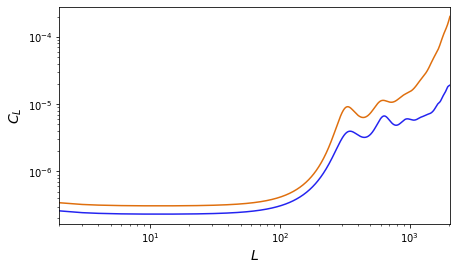

In [21]:
pl.plot_1dstyle(xmin=2,xmax=aobj.lmax,xlog=True,ylog=True)
plot(L,alTB)
plot(L,alEB)

In [7]:
nl  = np.zeros((4,rlmax+1))
ac2rad = np.pi/10800.
sig = 70.
nl[0,:] = .5*(sig*ac2rad/2.7255e6)**2*np.exp(L*(L+1)*(7.*ac2rad)**2/8./np.log(2.))
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = aobj.lcl + nl

In [17]:
Ag, Ac = {}, {}
Ag['TE'], Ac['TE'] = cs.norm_imag.qte('lens',aobj.lmax,rlmin,rlmax,aobj.lcl[3,:],ocl[0,:],ocl[1,:],lfac='k')
Ag['EE'], Ac['EE'] = cs.norm_imag.qee('lens',aobj.lmax,rlmin,rlmax,aobj.lcl[1,:],ocl[1,:],lfac='k')
Ag['TB'], Ac['TB'] = cs.norm_imag.qtb('lens',aobj.lmax,rlmin,rlmax,aobj.lcl[3,:],ocl[0,:],ocl[2,:],lfac='k')
Ag['EB'], Ac['EB'] = cs.norm_imag.qeb('lens',aobj.lmax,rlmin,rlmax,aobj.lcl[1,:],ocl[1,:],ocl[2,:],lfac='k')
Ag['BB'], Ac['BB'] = cs.norm_imag.qbb('lens',aobj.lmax,rlmin,rlmax,aobj.lcl[1,:],ocl[2,:],lfac='k')

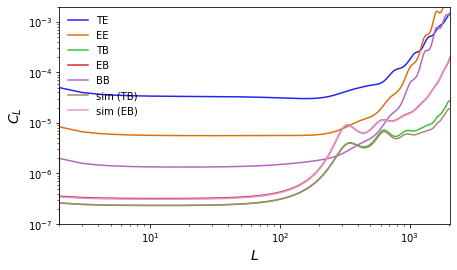

In [23]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=aobj.lmax,xlog=True,ymin=1e-7,ymax=2e-3,ylog=True)
for qi, q in enumerate(['TE','EE','TB','EB','BB']):
    plot(L,Ag[q],label=q)
plot(L,alTB,label='sim (TB)')
plot(L,alEB,label='sim (EB)')
legend()